In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

In [3]:
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

print("Input features (X):")
print(X)
print("Target outputs (y):")
print(y)

Input features (X):
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
Target outputs (y):
tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [5]:
model = nn.Sequential(
    nn.Linear(2, 4),  # Input layer to hidden layer
    nn.Tanh(),        # Non-linear activation
    nn.Linear(4, 1),  # Hidden layer to output layer
    nn.Sigmoid()      # Output activation for binary classification
)

print("Model architecture:")
print(model)

Model architecture:
Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
  (3): Sigmoid()
)


In [7]:

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [9]:
# Training loop
num_epochs = 5000
loss_values = []

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Store loss for plotting
    if epoch % 10 == 0:  # Record every 10 epochs to reduce memory usage
        loss_values.append(loss.item())
    
    # Print progress
    if epoch % 500 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.6f}')

# Final predictions
with torch.no_grad():
    predictions = model(X)
    print("\nFinal predictions:")
    for i, (input, target, pred) in enumerate(zip(X, y, predictions)):
        print(f"Input: {input.tolist()}, Target: {target.item():.2f}, Prediction: {pred.item():.4f}")

Epoch [0/5000], Loss: 0.759778
Epoch [500/5000], Loss: 0.010997
Epoch [1000/5000], Loss: 0.003177
Epoch [1500/5000], Loss: 0.001538
Epoch [2000/5000], Loss: 0.000898
Epoch [2500/5000], Loss: 0.000577
Epoch [3000/5000], Loss: 0.000392
Epoch [3500/5000], Loss: 0.000277
Epoch [4000/5000], Loss: 0.000201
Epoch [4500/5000], Loss: 0.000148

Final predictions:
Input: [0.0, 0.0], Target: 0.00, Prediction: 0.0001
Input: [0.0, 1.0], Target: 1.00, Prediction: 0.9999
Input: [1.0, 0.0], Target: 1.00, Prediction: 0.9999
Input: [1.0, 1.0], Target: 0.00, Prediction: 0.0001


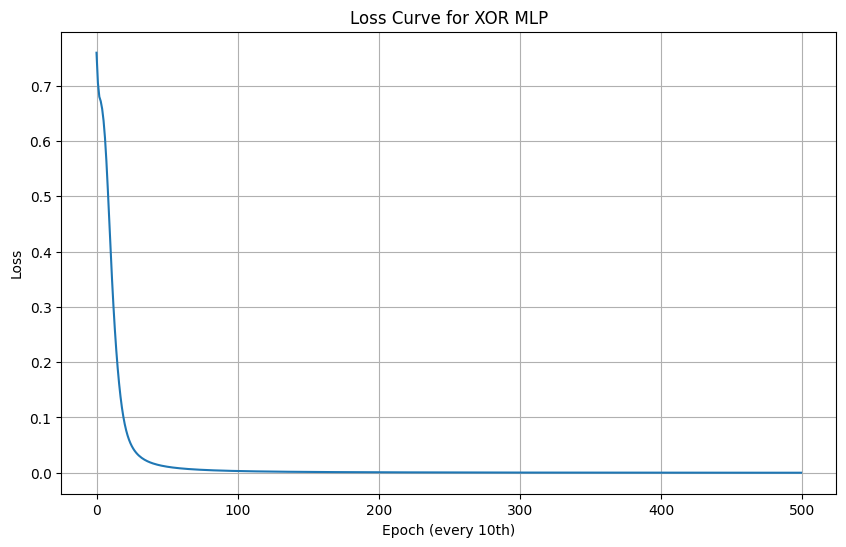

In [11]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(loss_values)
plt.title("Loss Curve for XOR MLP")
plt.xlabel("Epoch (every 10th)")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

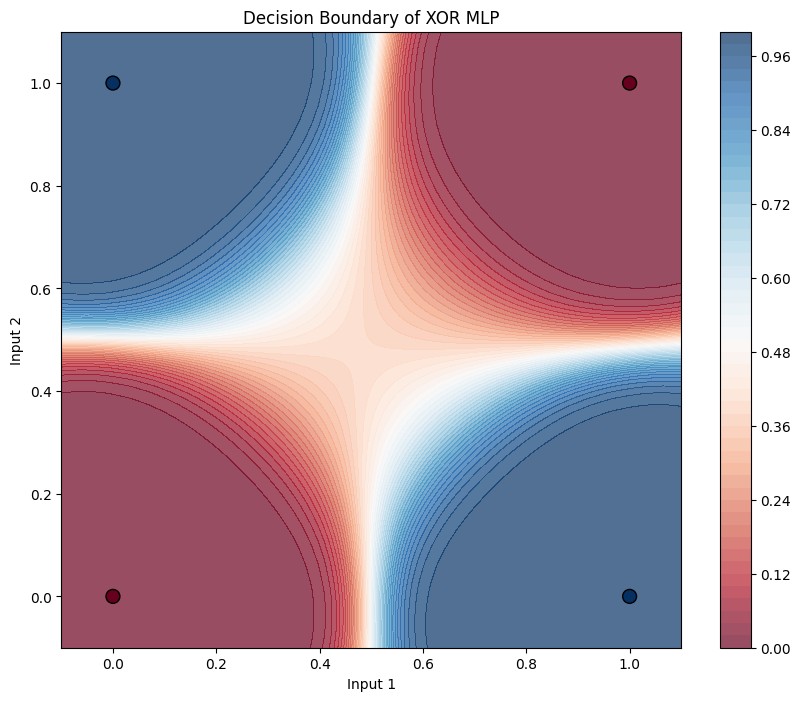

In [13]:
# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Make predictions on the mesh grid
    mesh_data = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(mesh_data).numpy()
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=50, cmap='RdBu', alpha=0.7)
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), s=100, cmap='RdBu', edgecolors='black')
    plt.title("Decision Boundary of XOR MLP")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_decision_boundary(model, X, y)

In [15]:
# Test the model with all possible inputs
print("Testing the trained model:")
with torch.no_grad():
    for i in range(len(X)):
        prediction = model(X[i])
        print(f"Input: {X[i].tolist()}, Expected: {y[i].item()}, Predicted: {prediction.item():.4f} → {'✓' if round(prediction.item()) == y[i].item() else '✗'}")

Testing the trained model:
Input: [0.0, 0.0], Expected: 0.0, Predicted: 0.0001 → ✓
Input: [0.0, 1.0], Expected: 1.0, Predicted: 0.9999 → ✓
Input: [1.0, 0.0], Expected: 1.0, Predicted: 0.9999 → ✓
Input: [1.0, 1.0], Expected: 0.0, Predicted: 0.0001 → ✓


In [17]:
# Save the model
torch.save(model.state_dict(), 'xor_model.pth')
print("Model saved as 'xor_model.pth'")

Model saved as 'xor_model.pth'
